<a href="https://colab.research.google.com/github/shivani-nandani/rumor-spread/blob/main/SICR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\alpha =$ spreading rate

$\beta =$ ignoring rate

$\theta =$ refuting rate

$\gamma =$ stifling rate

$\eta =$ pesuading rate

### when susceptible ($S$) comes in contact with infected ($I$):
1. $S \xrightarrow{\alpha} I$
2. $S \xrightarrow{\beta} R$
3. $S \xrightarrow{\theta} C$

### when infected ($I$) comes in contact with another infected ($I$):
$I \xrightarrow{\gamma} R$

### when counterattack ($C$) has infected neighbours ($I$):
$I \xrightarrow{\eta} R$

### equations:
- $\displaystyle \frac{dS}{dt} = -(\alpha + \beta + \theta)kSI$


- $\displaystyle \frac{dI}{dt} = \alpha kSI - \eta kIC - \gamma kI(R+I)$


- $\displaystyle \frac{dC}{dt} = \theta kSI$


- $\displaystyle \frac{dR}{dt} = \beta kSI + \eta kIC + \gamma kI(R+I)$

where $k$ denotes the average degree of the network.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
%matplotlib inline


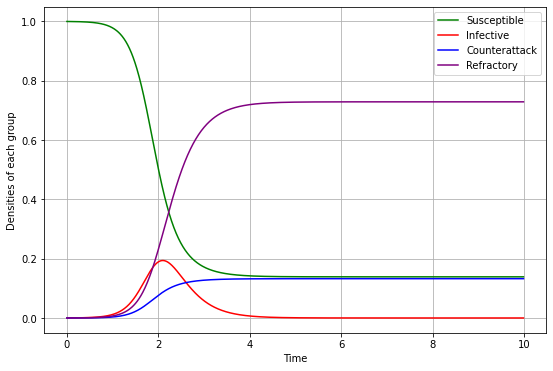

In [ ]:
N = 5000   # population

S0 = (N-1)/N
I0 = 1/N
C0 = 0/N
R0 = 0/N

# rates
alpha = 0.7  
beta = 0.4
theta = 0.2
gamma = 0.5 
eta = 0.8

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

S = np.zeros(n)
I = np.zeros(n)
C = np.zeros(n)
R = np.zeros(n)

S[0] = S0
I[0] = I0
C[0] = C0
R[0] = R0

for i in range(1, n):
    S[i] = S[i-1] - (alpha + beta + theta)*k*S[i-1]*I[i-1]*dt
    I[i] = I[i-1] + (alpha*k*S[i-1]*I[i-1] - eta*k*I[i-1]*C[i-1] - gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
    C[i] = C[i-1] + theta*k*S[i-1]*I[i-1]*dt
    R[i] = R[i-1] + (beta*k*S[i-1]*I[i-1] + eta*k*I[i-1]*C[i-1] + gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt


plt.figure(figsize=[9, 6])
plt.plot(t, S, c='green', linestyle='-', label='Susceptible')
plt.plot(t, I, c='red', linestyle='-', label='Infective')
plt.plot(t, C, c='blue', linestyle='-', label='Counterattack')
plt.plot(t, R, c='purple', linestyle='-', label='Refractory')
plt.ylabel('Densities of each group')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [ ]:
print('Fraction Susceptible = ', S[-1])
print('Fraction Infective = ', I[-1])
print('Fraction Counterattack = ', C[-1])
print('Fraction Refractory = ', R[-1])

Fraction Susceptible =  0.13871820890030945
Fraction Infective =  8.617639466066752e-09
Fraction Counterattack =  0.13247412170764467
Fraction Refractory =  0.7288076607744066


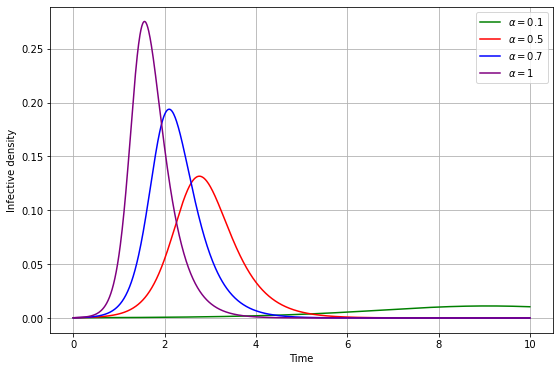

In [ ]:
N = 5000   # population

S0 = (N-1)/N
I0 = 1/N
C0 = 0/N
R0 = 0/N

# rates
alpha_set = [0.1, 0.5, 0.7, 1]
beta = 0.4
theta = 0.2
gamma = 0.5 
eta = 0.8

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

S = np.zeros(n)
I = np.zeros(n)
C = np.zeros(n)
R = np.zeros(n)

S[0] = S0
I[0] = I0
C[0] = C0
R[0] = R0

plt.figure(figsize=[9, 6])
color = iter(['green', 'red', 'blue', 'purple'])
# marker = iter(['o', '*', 'D', '^'])

for alpha in alpha_set:
    for i in range(1, n):
        S[i] = S[i-1] - (alpha + beta + theta)*k*S[i-1]*I[i-1]*dt
        I[i] = I[i-1] + (alpha*k*S[i-1]*I[i-1] - eta*k*I[i-1]*C[i-1] - gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
        C[i] = C[i-1] + theta*k*S[i-1]*I[i-1]*dt
        R[i] = R[i-1] + (beta*k*S[i-1]*I[i-1] + eta*k*I[i-1]*C[i-1] + gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
    plt.plot(t, I, c=next(color), linestyle='-', label=r'$\alpha=$'+str(alpha))

plt.ylabel('Infective density')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid()
plt.show()


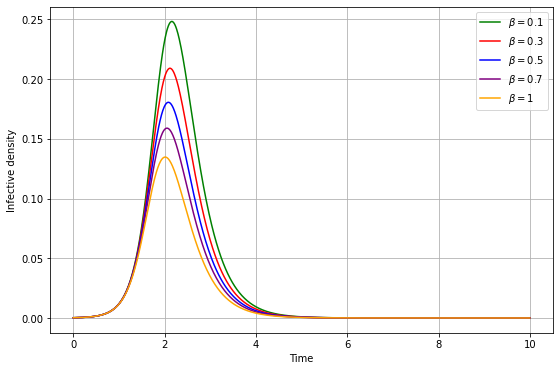

In [ ]:
N = 5000   # population

S0 = (N-1)/N
I0 = 1/N
C0 = 0/N
R0 = 0/N

# rates
alpha = 0.7
beta_set = [0.1, 0.3, 0.5, 0.7, 1]
theta = 0.2
gamma = 0.5 
eta = 0.8

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

S = np.zeros(n)
I = np.zeros(n)
C = np.zeros(n)
R = np.zeros(n)

S[0] = S0
I[0] = I0
C[0] = C0
R[0] = R0

plt.figure(figsize=[9, 6])
color = iter(['green', 'red', 'blue', 'purple', 'orange'])

for beta in beta_set:
    for i in range(1, n):
        S[i] = S[i-1] - (alpha + beta + theta)*k*S[i-1]*I[i-1]*dt
        I[i] = I[i-1] + (alpha*k*S[i-1]*I[i-1] - eta*k*I[i-1]*C[i-1] - gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
        C[i] = C[i-1] + theta*k*S[i-1]*I[i-1]*dt
        R[i] = R[i-1] + (beta*k*S[i-1]*I[i-1] + eta*k*I[i-1]*C[i-1] + gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
    plt.plot(t, I, c=next(color), linestyle='-', label=r'$\beta=$'+str(beta))

plt.ylabel('Infective density')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid()
plt.show()


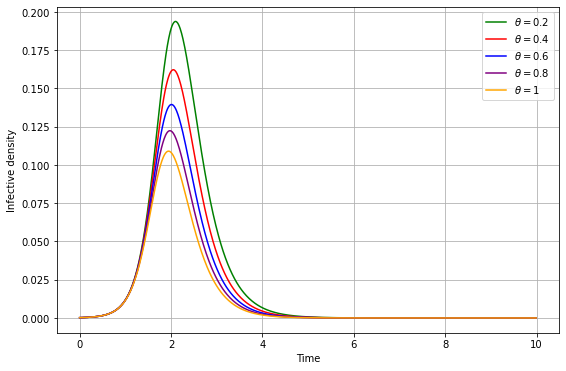

In [ ]:
N = 5000   # population

S0 = (N-1)/N
I0 = 1/N
C0 = 0/N
R0 = 0/N

# rates
alpha = 0.7
beta = 0.4
theta_set = [0.2, 0.4, 0.6, 0.8, 1]
gamma = 0.5 
eta = 0.8

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

S = np.zeros(n)
I = np.zeros(n)
C = np.zeros(n)
R = np.zeros(n)

S[0] = S0
I[0] = I0
C[0] = C0
R[0] = R0

plt.figure(figsize=[9, 6])
color = iter(['green', 'red', 'blue', 'purple', 'orange'])

for theta in theta_set:
    for i in range(1, n):
        S[i] = S[i-1] - (alpha + beta + theta)*k*S[i-1]*I[i-1]*dt
        I[i] = I[i-1] + (alpha*k*S[i-1]*I[i-1] - eta*k*I[i-1]*C[i-1] - gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
        C[i] = C[i-1] + theta*k*S[i-1]*I[i-1]*dt
        R[i] = R[i-1] + (beta*k*S[i-1]*I[i-1] + eta*k*I[i-1]*C[i-1] + gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
    plt.plot(t, I, c=next(color), linestyle='-', label=r'$\theta=$'+str(theta))

plt.ylabel('Infective density')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid()
plt.show()


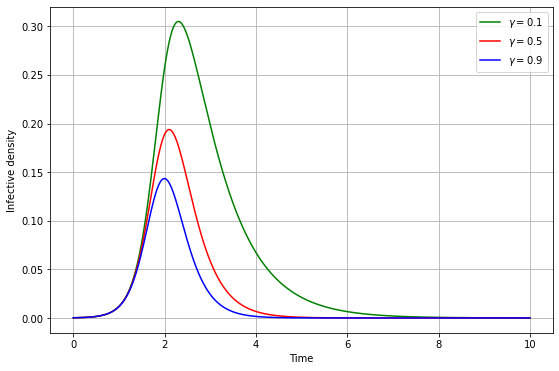

In [ ]:
N = 5000   # population

S0 = (N-1)/N
I0 = 1/N
C0 = 0/N
R0 = 0/N

# rates
alpha = 0.7
beta = 0.4
theta = 0.2
gamma_set = [0.1, 0.5, 0.9]
eta = 0.8

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

S = np.zeros(n)
I = np.zeros(n)
C = np.zeros(n)
R = np.zeros(n)

S[0] = S0
I[0] = I0
C[0] = C0
R[0] = R0

plt.figure(figsize=[9, 6])
color = iter(['green', 'red', 'blue', 'purple', 'orange'])

for gamma in gamma_set:
    for i in range(1, n):
        S[i] = S[i-1] - (alpha + beta + theta)*k*S[i-1]*I[i-1]*dt
        I[i] = I[i-1] + (alpha*k*S[i-1]*I[i-1] - eta*k*I[i-1]*C[i-1] - gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
        C[i] = C[i-1] + theta*k*S[i-1]*I[i-1]*dt
        R[i] = R[i-1] + (beta*k*S[i-1]*I[i-1] + eta*k*I[i-1]*C[i-1] + gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
    plt.plot(t, I, c=next(color), linestyle='-', label=r'$\gamma=$'+str(gamma))

plt.ylabel('Infective density')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid()
plt.show()


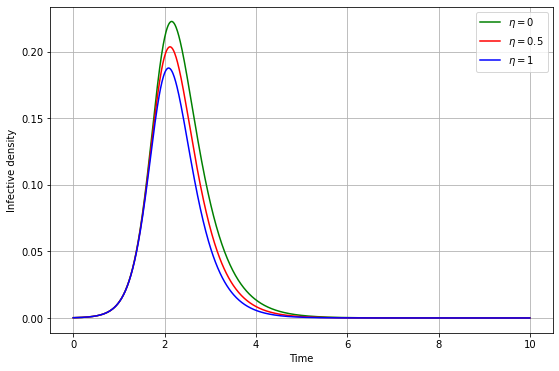

In [ ]:
N = 5000   # population

S0 = (N-1)/N
I0 = 1/N
C0 = 0/N
R0 = 0/N

# rates
alpha = 0.7
beta = 0.4
theta = 0.2
gamma = 0.5
eta_set = [0, 0.5, 1]

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

S = np.zeros(n)
I = np.zeros(n)
C = np.zeros(n)
R = np.zeros(n)

S[0] = S0
I[0] = I0
C[0] = C0
R[0] = R0

plt.figure(figsize=[9, 6])
color = iter(['green', 'red', 'blue', 'purple', 'orange'])

for eta in eta_set:
    for i in range(1, n):
        S[i] = S[i-1] - (alpha + beta + theta)*k*S[i-1]*I[i-1]*dt
        I[i] = I[i-1] + (alpha*k*S[i-1]*I[i-1] - eta*k*I[i-1]*C[i-1] - gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
        C[i] = C[i-1] + theta*k*S[i-1]*I[i-1]*dt
        R[i] = R[i-1] + (beta*k*S[i-1]*I[i-1] + eta*k*I[i-1]*C[i-1] + gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
    plt.plot(t, I, c=next(color), linestyle='-', label=r'$\eta=$'+str(eta))

plt.ylabel('Infective density')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.grid()
plt.show()


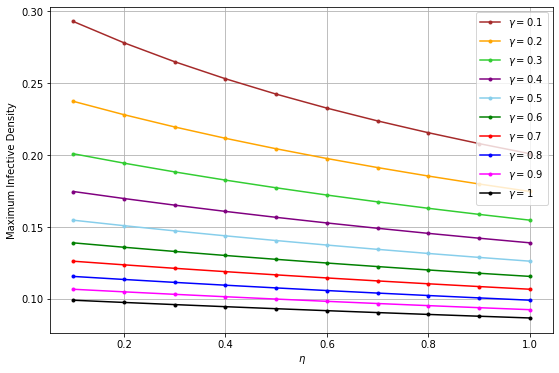

In [ ]:
N = 5000   # population

S0 = (N-1)/N
I0 = 1/N
C0 = 0/N
R0 = 0/N

# rates
alpha = 0.5
beta = 0.4
theta = 0.2
gamma_set = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
eta_set = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# homogenous network
k = 6   # degree

start = 0
end = 30
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

S = np.zeros(n)
I = np.zeros(n)
C = np.zeros(n)
R = np.zeros(n)

S[0] = S0
I[0] = I0
C[0] = C0
R[0] = R0

plt.figure(figsize=[9, 6])
color = iter(['brown', 'orange', 'limegreen', 'purple', 'skyblue', 'green', 'red', 'blue', 'magenta', 'black'])

for gamma in gamma_set:
    I_max = []
    for eta in eta_set:
        for i in range(1, n):
            S[i] = S[i-1] - (alpha + beta + theta)*k*S[i-1]*I[i-1]*dt
            I[i] = I[i-1] + (alpha*k*S[i-1]*I[i-1] - eta*k*I[i-1]*C[i-1] - gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
            C[i] = C[i-1] + theta*k*S[i-1]*I[i-1]*dt
            R[i] = R[i-1] + (beta*k*S[i-1]*I[i-1] + eta*k*I[i-1]*C[i-1] + gamma*k*I[i-1]*(R[i-1]+I[i-1]))*dt
        I_max.append(max(I))
    plt.plot(eta_set, I_max, c=next(color), linestyle='-', marker='.', label=r'$\gamma=$'+str(gamma))

plt.ylabel('Maximum Infective Density')
plt.xlabel(r'$\eta$')
plt.legend(loc='upper right')
plt.grid()
plt.show()


- green = Susceptible
- red = Infective
- blue = Counterattack
- purple = Refractory

initially, 
- Susceptible = (N-1)
- Infective = 1
- Counterattack = 0
- Refractory = 0

In [ ]:
sicr_color = dict()
sicr_color['s'] = 'limegreen'
sicr_color['i'] = 'red'
sicr_color['c'] = 'blue'
sicr_color['r'] = 'purple'
sicr_color

{'c': 'blue', 'i': 'red', 'r': 'purple', 's': 'limegreen'}

In [ ]:
N = 5000 # population

# probabilities
alpha = 0.7  
beta = 0.4
theta = 0.2
gamma = 0.5 
eta = 0.8

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [ ]:
color_map = np.empty(N).astype(str)

color_map[1:] = sicr_color['s']
color_map[0] = sicr_color['i']

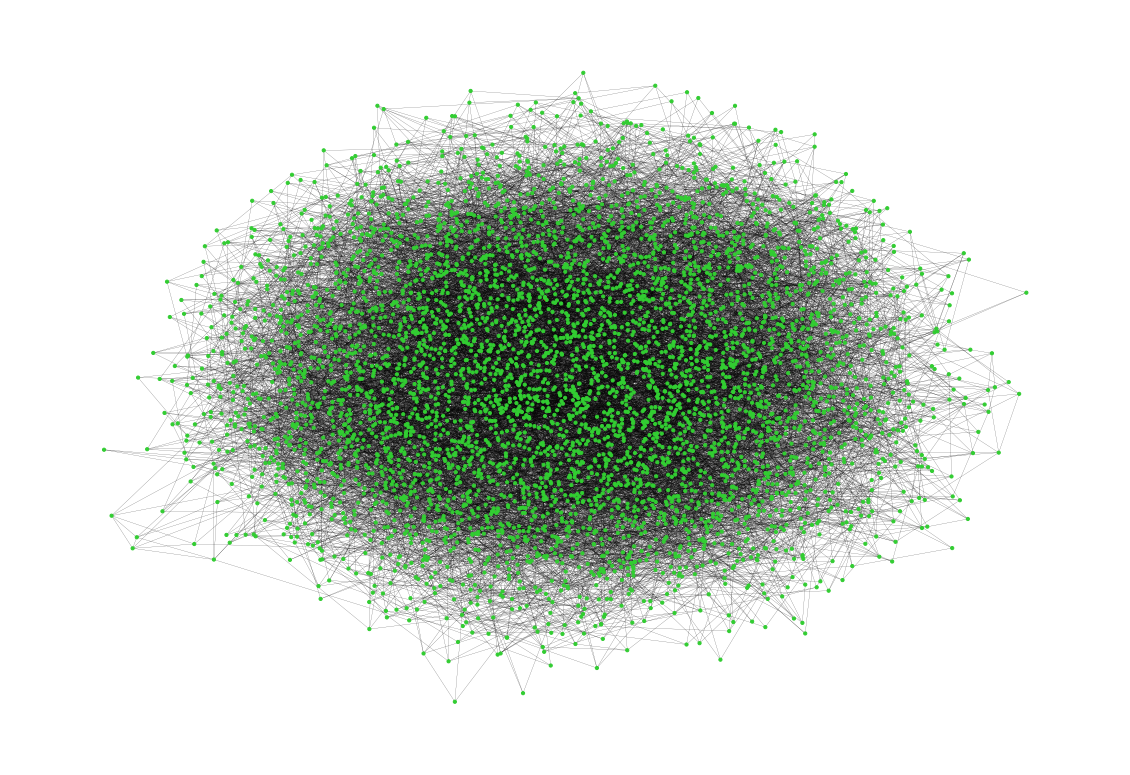

In [ ]:
G = nx.connected_watts_strogatz_graph(n = N, k = k, p = 0.5, tries=100)

pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [23]:
for t in range(1, n):
    for i in range(G.number_of_nodes()):
        rand_num = rd.random()
        # if node is susceptible and at least one neighboring node is infected
        if color_map[i] == sicr_color['s'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            path = rd.randint(0,2)
            # s -> i
            if path == 0:
                if rand_num < alpha:
                    color_map[i] = sicr_color['i']
            # s -> c
            elif path == 1: 
                if rand_num < theta:
                    color_map[i] = sicr_color['c']
            # s -> r
            else:
                if rand_num < beta:
                    color_map[i] = sicr_color['r']
        # if node is infected and at least one neighboring node is infected
        elif color_map[i] == sicr_color['i'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < gamma:
                color_map[i] = sicr_color['r']
#         # if node is counterattack and all neighboring nodes are infected
#         elif color_map[i] == sicr_color['c'] and all([sicr_color['i'] == color for color in [color_map[i] for i in [n for n in G.neighbors(i)]]]):
        # if node is counterattack and at least one neighboring nodes is infected
        elif color_map[i] == sicr_color['c'] and sicr_color['i'] in [color_map[j] for j in [n for n in G.neighbors(i)]]:
            if rand_num < eta:
                for n in G.neighbors(i):
                    if color_map[n] == sicr_color['i']:
                        color_map[n] = sicr_color['r']

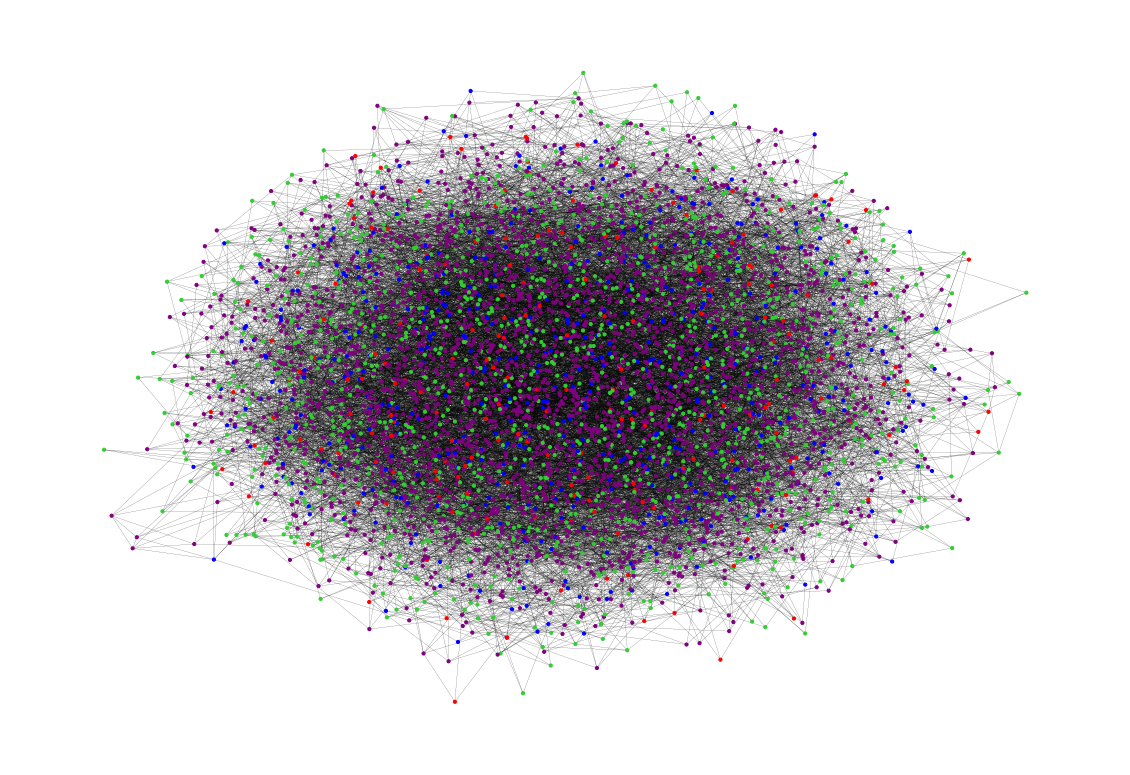

In [24]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [25]:
num_s = 0
num_i = 0
num_c = 0
num_r = 0
for i in range(G.number_of_nodes()):
    num_s += sum([sicr_color['s']==color_map[i]])
    num_i += sum([sicr_color['i']==color_map[i]])
    num_c += sum([sicr_color['c']==color_map[i]])
    num_r += sum([sicr_color['r']==color_map[i]])
    
print('Fraction Susceptible = ', num_s/N)
print('Fraction Infective = ', num_i/N)
print('Fraction Counterattack = ', num_c/N)
print('Fraction Refractory = ', num_r/N)

Fraction Susceptible =  0.2728
Fraction Infective =  0.0432
Fraction Counterattack =  0.1108
Fraction Refractory =  0.5732
